<a href="https://colab.research.google.com/github/eteh1/Using-GIS-and-machine-learning-to-monitor-sandbars-along-the-Niger-River-in-the-Niger-Delta-Nigeria./blob/main/Change_Detection_Analysis_for_Monitoring_of_Sandbar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from scipy.stats import pearsonr, spearmanr, ttest_ind
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
data = {
    "1974": [2.22, 24.15, 4.39, 4.39, 2.22, 2.22, 4.39, 382.53, 176.93, 305.48, 147.91, 247.53, 675.89, 20.89, 4.39, 6.71, 137.53, 10.70, 4.39, 673.57, 4.44, 762.03, 2.22, 166.03, 42.14, 564.50, 171.12, 277.08, 7.70, 33.19, 4.39, 226.89, 319.66, 20.28, 2.22, 1169.62],
    "1984": [544.63, 2.07, 240.42, 13.32, 2.07, 2.07, 4.13, 24.73, 414.04, 167.28, 200.50, 161.12, 36.14, 190.99, 51.08, 13.54, 60.98, 225.26, 34.31, 9.75, 2.07, 2.07, 30.84, 152.01, 2.07, 113.25, 159.02, 110.24, 367.64, 163.71, 1.94, 1.94, 9.96, 2.07, 4.13, 773.33],
    "1994": [182.78, 1002.98, 105.90, 117.23, 3.45, 3.45, 27.46, 6.88, 3.45, 155.69, 3.45, 6.80, 566.06, 6.80, 3.45, 15.12, 6.80, 15.23, 3.45, 10.41, 3.45, 3.45, 3.45, 6.80, 3.45, 6.80, 499.95, 3.45, 3.45, 11.94, 3.45, 150.67, 98.30, 3.45, 3.45, 165.64],
    "2004": [2.07, 2.07, 2.07, 2.07, 23.19, 6.32, 3.03, 522.95, 2.07, 18.31, 2.07, 2.07, 15.99, 2.07, 8.13, 2.07, 2.07, 4.13, 28.49, 8.43, 9.96, 4.08, 7.10, 31.06, 2.07, 2.07, 2.07, 2.07, 129.05, 2.07, 2.07, 4.13, 1567.41, 2.07, 2.07, 1.94],
    "2014": [7.10, 223.68, 21.90, 37.77, 13.32, 2.07, 38.48, 81.04, 1387.01, 4.13, 860.63, 41.29, 140.87, 7.10, 2.07, 289.26, 2.07, 102.22, 957.43, 2.07, 108.14, 16.01, 75.11, 2.07, 2.07, 2.07, 4.08, 2.07, 210.04, 128.37, 73.63, 7.10, 11.38, 6.84, 3.03, 1.94],
    "2024": [19.31, 10.51, 4.75, 2.38, 2.38, 2.38, 323.47, 2.38, 708.23, 10.44, 6.96, 3.48, 126.17, 480.25, 483.60, 607.42, 511.54, 76.65, 2.38, 385.03, 2.38, 2.38, 2.38, 2.38, 36.95, 81.84, 2.38, 9.39, 6.98, 2.38, 4.75, 2.38, 2.38, 568.74, 147.39, 405.01]
}

df = pd.DataFrame(data)

# Descriptive Statistics
desc_stats = df.describe()
print("Descriptive Statistics:")
print(desc_stats)

# Change Detection Analysis
df_diff = df.diff(axis=1)
print("\nChange Detection Analysis:")
print(df_diff)

# Pearson Correlation Coefficient
print("\nPearson Correlation Coefficient:")
for year1 in df.columns:
    for year2 in df.columns:
        if year1 != year2:
            corr, _ = pearsonr(df[year1].dropna(), df[year2].dropna())
            print(f"Pearson correlation between {year1} and {year2}: {corr:.2f}")

# Spearman's Rank Correlation Coefficient
print("\nSpearman's Rank Correlation Coefficient:")
for year1 in df.columns:
    for year2 in df.columns:
        if year1 != year2:
            corr, _ = spearmanr(df[year1].dropna(), df[year2].dropna())
            print(f"Spearman correlation between {year1} and {year2}: {corr:.2f}")

# Time Series Analysis
print("\nTime Series Analysis (ADF Test):")
for year in df.columns:
    result = adfuller(df[year].dropna())
    print(f"ADF Statistic for {year}: {result[0]:.2f}, p-value: {result[1]:.2f}")

# Hypothesis Testing
print("\nHypothesis Testing (t-test between 1974 and 2024):")
t_stat, p_val = ttest_ind(df["1974"].dropna(), df["2024"].dropna())
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.2f}")

# Visualizations
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Sand bar Areas Across Years')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
pip install pandas numpy scipy statsmodels matplotlib seaborn


SyntaxError: invalid syntax (<ipython-input-4-86b29fbbf075>, line 66)

Descriptive Statistics:
              1974        1984         1994         2004         2014  \
count    36.000000   36.000000    36.000000    36.000000    36.000000   
mean    183.665000  119.297778    89.388611    67.526667   135.429444   
std     274.043124  172.315036   202.344848   271.825719   301.459484   
min       2.220000    1.940000     3.450000     1.940000     1.940000   
25%       4.390000    3.615000     3.450000     2.070000     2.790000   
50%      28.670000   35.225000     6.800000     2.070000    14.665000   
75%     254.917500  164.602500   100.200000     8.812500   103.700000   
max    1169.620000  773.330000  1002.980000  1567.410000  1387.010000   

             2024  
count   36.000000  
mean   140.272222  
std    219.170714  
min      2.380000  
25%      2.380000  
50%      8.185000  
75%    191.410000  
max    708.230000  

Change Detection Analysis:
    1974    1984     1994     2004     2014    2024
0    NaN  542.41  -361.85  -180.71     5.03   12.21
1    N

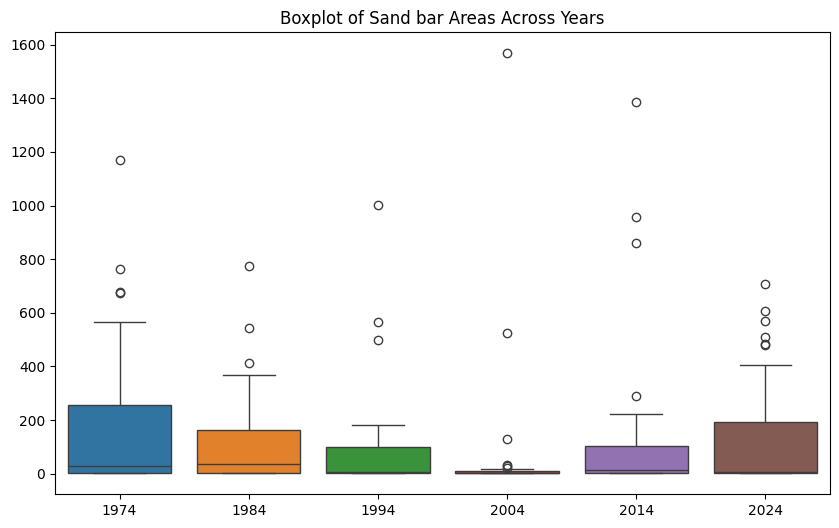

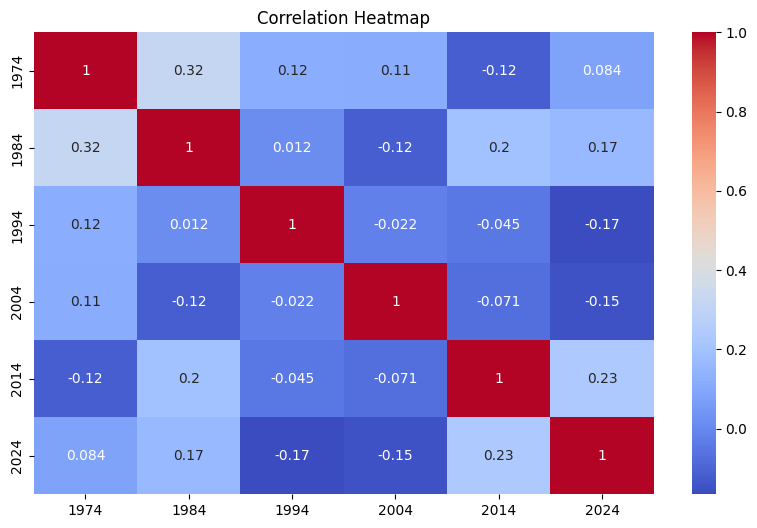

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, ttest_ind
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
data = {
    "1974": [2.22, 24.15, 4.39, 4.39, 2.22, 2.22, 4.39, 382.53, 176.93, 305.48, 147.91, 247.53, 675.89, 20.89, 4.39, 6.71, 137.53, 10.70, 4.39, 673.57, 4.44, 762.03, 2.22, 166.03, 42.14, 564.50, 171.12, 277.08, 7.70, 33.19, 4.39, 226.89, 319.66, 20.28, 2.22, 1169.62],
    "1984": [544.63, 2.07, 240.42, 13.32, 2.07, 2.07, 4.13, 24.73, 414.04, 167.28, 200.50, 161.12, 36.14, 190.99, 51.08, 13.54, 60.98, 225.26, 34.31, 9.75, 2.07, 2.07, 30.84, 152.01, 2.07, 113.25, 159.02, 110.24, 367.64, 163.71, 1.94, 1.94, 9.96, 2.07, 4.13, 773.33],
    "1994": [182.78, 1002.98, 105.90, 117.23, 3.45, 3.45, 27.46, 6.88, 3.45, 155.69, 3.45, 6.80, 566.06, 6.80, 3.45, 15.12, 6.80, 15.23, 3.45, 10.41, 3.45, 3.45, 3.45, 6.80, 3.45, 6.80, 499.95, 3.45, 3.45, 11.94, 3.45, 150.67, 98.30, 3.45, 3.45, 165.64],
    "2004": [2.07, 2.07, 2.07, 2.07, 23.19, 6.32, 3.03, 522.95, 2.07, 18.31, 2.07, 2.07, 15.99, 2.07, 8.13, 2.07, 2.07, 4.13, 28.49, 8.43, 9.96, 4.08, 7.10, 31.06, 2.07, 2.07, 2.07, 2.07, 129.05, 2.07, 2.07, 4.13, 1567.41, 2.07, 2.07, 1.94],
    "2014": [7.10, 223.68, 21.90, 37.77, 13.32, 2.07, 38.48, 81.04, 1387.01, 4.13, 860.63, 41.29, 140.87, 7.10, 2.07, 289.26, 2.07, 102.22, 957.43, 2.07, 108.14, 16.01, 75.11, 2.07, 2.07, 2.07, 4.08, 2.07, 210.04, 128.37, 73.63, 7.10, 11.38, 6.84, 3.03, 1.94],
    "2024": [19.31, 10.51, 4.75, 2.38, 2.38, 2.38, 323.47, 2.38, 708.23, 10.44, 6.96, 3.48, 126.17, 480.25, 483.60, 607.42, 511.54, 76.65, 2.38, 385.03, 2.38, 2.38, 2.38, 2.38, 36.95, 81.84, 2.38, 9.39, 6.98, 2.38, 4.75, 2.38, 2.38, 568.74, 147.39, 405.01]
}

df = pd.DataFrame(data)

# Descriptive Statistics
desc_stats = df.describe()
print("Descriptive Statistics:")
print(desc_stats)

# Change Detection Analysis
df_diff = df.diff(axis=1)
print("\nChange Detection Analysis:")
print(df_diff)

# Pearson Correlation Coefficient
print("\nPearson Correlation Coefficient:")
for year1 in df.columns:
    for year2 in df.columns:
        if year1 != year2:
            corr, _ = pearsonr(df[year1].dropna(), df[year2].dropna())
            print(f"Pearson correlation between {year1} and {year2}: {corr:.2f}")

# Spearman's Rank Correlation Coefficient
print("\nSpearman's Rank Correlation Coefficient:")
for year1 in df.columns:
    for year2 in df.columns:
        if year1 != year2:
            corr, _ = spearmanr(df[year1].dropna(), df[year2].dropna())
            print(f"Spearman correlation between {year1} and {year2}: {corr:.2f}")

# Time Series Analysis
print("\nTime Series Analysis (ADF Test):")
for year in df.columns:
    result = adfuller(df[year].dropna())
    print(f"ADF Statistic for {year}: {result[0]:.2f}, p-value: {result[1]:.2f}")

# Hypothesis Testing
print("\nHypothesis Testing (t-test between 1974 and 2024):")
t_stat, p_val = ttest_ind(df["1974"].dropna(), df["2024"].dropna())
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.2f}")

# Visualizations
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Sand bar Areas Across Years')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import numpy as np
from scipy import stats

# Data
data = {
    '1974': [2.22, 24.15, 4.39, 4.39, 2.22, 2.22, 4.39, 382.53, 176.93, 305.48, 147.91, 247.53, 675.89, 20.89, 4.39, 6.71, 137.53, 10.70, 4.39, 673.57, 4.44, 762.03, 2.22, 166.03, 42.14, 564.50, 171.12, 277.08, 7.70, 33.19, 4.39, 226.89, 319.66, 20.28, 2.22, 1169.62],
    '1984': [544.63, 2.07, 240.42, 13.32, 2.07, 2.07, 4.13, 24.73, 414.04, 167.28, 200.50, 161.12, 36.14, 190.99, 51.08, 13.54, 60.98, 225.26, 34.31, 9.75, 2.07, 2.07, 30.84, 152.01, 2.07, 113.25, 159.02, 110.24, 367.64, 163.71, 1.94, 1.94, 9.96, 2.07, 4.13, 773.33],
    '1994': [182.78, 1002.98, 105.90, 117.23, 3.45, 3.45, 27.46, 6.88, 3.45, 155.69, 3.45, 6.80, 566.06, 6.80, 3.45, 15.12, 6.80, 15.23, 3.45, 10.41, 3.45, 3.45, 3.45, 6.80, 3.45, 6.80, 499.95, 3.45, 3.45, 11.94, 3.45, 150.67, 98.30, 3.45, 3.45, 165.64],
    '2004': [2.07, 2.07, 2.07, 2.07, 23.19, 6.32, 3.03, 522.95, 2.07, 18.31, 2.07, 2.07, 15.99, 2.07, 8.13, 2.07, 2.07, 4.13, 28.49, 8.43, 9.96, 4.08, 7.10, 31.06, 2.07, 2.07, 2.07, 2.07, 129.05, 2.07, 2.07, 4.13, 1567.41, 2.07, 2.07, 1.94],
    '2014': [7.10, 223.68, 21.90, 37.77, 13.32, 2.07, 38.48, 81.04, 1387.01, 4.13, 860.63, 41.29, 140.87, 7.10, 2.07, 289.26, 2.07, 102.22, 957.43, 2.07, 108.14, 16.01, 75.11, 2.07, 2.07, 2.07, 4.08, 2.07, 210.04, 128.37, 73.63, 7.10, 11.38, 6.84, 3.03, 1.94],
    '2024': [19.31, 10.51, 4.75, 2.38, 2.38, 2.38, 323.47, 2.38, 708.23, 10.44, 6.96, 3.48, 126.17, 480.25, 483.60, 607.42, 511.54, 76.65, 2.38, 385.03, 2.38, 2.38, 2.38, 2.38, 36.95, 81.84, 2.38, 9.39, 6.98, 2.38, 4.75, 2.38, 2.38, 568.74, 147.39, 405.01]
}

years = ['1974', '1984', '1994', '2004', '2014', '2024']

results = []

for i in range(len(years) - 1):
    year1, year2 = years[i], years[i + 1]
    diff = np.array(data[year1]) - np.array(data[year2])
    t_stat, p_value = stats.ttest_rel(data[year1], data[year2])
    mean_diff = np.mean(diff)
    results.append([f'{year1} vs. {year2}', mean_diff, t_stat, p_value, 'Reject H0' if p_value < 0.05 else 'Fail to Reject H0'])

# Display results in table format
import pandas as pd

df = pd.DataFrame(results, columns=['Years Compared', 'Mean Difference', 't-Statistic', 'p-Value', 'Conclusion (α = 0.05)'])
df


,Years Compared,Mean Difference,t-Statistic,p-Value,Conclusion (α = 0.05)
0,1974 vs. 1984,64.367222,1.413973,0.166204,Fail to Reject H0
1,1984 vs. 1994,29.909167,0.679333,0.501395,Fail to Reject H0
2,1994 vs. 2004,21.861944,0.383152,0.703924,Fail to Reject H0
3,2004 vs. 2014,-67.902778,-0.970097,0.338655,Fail to Reject H0
4,2014 vs. 2024,-4.842778,-0.088344,0.930107,Fail to Reject H0


In [ ]:
import scipy.stats as stats

# Data for the Mean column across years
data_1974 = [183.66]  # Add other data points similarly
data_1984 = [119.30]
data_1994 = [89.39]
data_2004 = [67.53]
data_2014 = [135.43]
data_2024 = [140.27]

# Perform one-way ANOVA
statistic, p_value = stats.f_oneway(data_1974, data_1984, data_1994, data_2004, data_2014, data_2024)

print(f"F-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")


F-statistic: nan
P-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
